In [22]:
from networkx.algorithms import bipartite
import csv
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
movies = []
with open('SENA_DataSet - MCUActorList.csv',encoding="utf8") as f:
    file = csv.reader(f)
    for line in file:
        movies.append(line[0])
movies

['Iron Man',
 'The incredible Hulk',
 'Iron Man 2',
 'Thor',
 'Captain America: The first Avenger',
 "Marvel's the Avengers",
 'Iron Man 3',
 'Thor: The dark world',
 'Captain America : The Winter Soldier',
 'Guardians Of the Galaxy',
 'Avengers : Age of Ultron',
 'Ant-Man',
 'Captain America: Civil War',
 'Doctor Strange',
 'Guardians of the Galaxy Vol. 2',
 'Spider-Man:Homecoming',
 'Thor:Ragnarok',
 'Black Panther',
 'Avengers: Infinity War',
 'Ant-Man and the Wasp',
 'Captain-Marvel',
 'Avengers:Endgame',
 'Spider-Man:Far From Home',
 'Black Widow',
 'Shang-Chi and the Legend of the Ten Rings',
 'Eternals',
 'Spider-Man: No Way Home',
 'Doctor Strange in the Multiverse of Madness',
 'Thor: Love and Thunder',
 'Werewolf by Night',
 "Marvels' Agents of S.H.I.E.L.D.",
 "Marvel's Agent Carter",
 "Marvels's Daredevil",
 'Marvel - Jessica Jones',
 "Marvel's Luke Cage",
 "Marvel's Iron Fist",
 'Marvel - The Defenders',
 'Inhumans',
 "Marvel's The Punisher",
 "Marvel's Runaways",
 'Cloak &

In [3]:
actors = set()
with open('SENA_DataSet - MCUActorList.csv', encoding="utf8") as f:
    file = csv.reader(f)
    for line in file:
        for actor in line[1:]:
            if actor != '':
                actors.add(actor)
actors

{'Adam Beach',
 'Alaqua Cox ',
 'Alexandra Shipp',
 'Alfre Woodard',
 'Alice Braga',
 'Allegra Acosta',
 'Amber Rose Revah',
 'Andrea Roth',
 'Andrew Garfield',
 'Angelina Jolie',
 'Anna Paquin',
 'Anson Mount',
 'Anthony Hopkins',
 'Anthony Mackie',
 'Anya Taylor-Joy',
 'Ariela Barer',
 'Aubrey Joseph',
 'Awkwafina',
 'Barry Keoghan',
 'Ben Barnes',
 'Ben Kingsley',
 'Ben Mendelsohn',
 'Benedict Cumberbatch',
 'Benedict Wong',
 'Blu Hunt',
 'Boyd Holbrook',
 'Brad Pitt',
 'Bradely Cooper',
 'Bradley Cooper',
 'Brett Dalton',
 'Brianna Hildebrand',
 'Bridget Regan',
 'Brie Larson',
 'Bruce Davison',
 'Cate Blanchett',
 'Chad Michel Murray',
 'Chadwick Boseman',
 'Charlie Cox',
 'Charlie Heaton',
 'Chiswetel Ejiofor',
 'Chloe Bennet',
 'Chris Evans',
 'Chris Hemsworth',
 'Chris Patt',
 'Christian Bale',
 'Clark Gregg',
 'Colby Minifie',
 'Corey Stall',
 'Dafne Keen',
 'Danial Bruhl',
 'Danniel Bruhl',
 'Danny Huston',
 'Dave Bautista',
 'David Harbour',
 'David Tennant',
 'David Wenham'

In [4]:
ratings = {}
with open('SENA_DataSet - MCUCriticRatingList.csv', encoding="utf8") as f:
    file = csv.reader(f)
    for line in file:
        if line[-1] != '':
            ratings[line[0]] = int(line[-1])
print('Normalized ratings : ',ratings)

Normalized ratings :  {'Iron Man': 58, 'The incredible Hulk': 43, 'Iron Man 2': 43, 'Thor': 45, 'Captain America: The first Avenger': 48, "Marvel's the Avengers": 53, 'Iron Man 3': 71, 'Thor: The dark world': 60, 'Captain America : The Winter Soldier': 80, 'Guardians Of the Galaxy': 84, 'Avengers : Age of Ultron': 71, 'Ant-Man': 74, 'Captain America: Civil War': 83, 'Doctor Strange': 81, 'Guardians of the Galaxy Vol. 2': 76, 'Spider-Man:Homecoming': 83, 'Thor:Ragnarok': 84, 'Black Panther': 92, 'Avengers: Infinity War': 77, 'Ant-Man and the Wasp': 79, 'Captain-Marvel': 72, 'Avengers:Endgame': 86, 'Spider-Man:Far From Home': 80, 'Black Widow': 73, 'Shang-Chi and the Legend of the Ten Rings': 81, 'Eternals': 50, 'Spider-Man: No Way Home': 82, 'Doctor Strange in the Multiverse of Madness': 67, 'Thor: Love and Thunder': 61, 'Werewolf by Night': 77, "Marvels' Agents of S.H.I.E.L.D.": 85, "Marvel's Agent Carter": 79, "Marvels's Daredevil": 84, 'Marvel - Jessica Jones': 82, "Marvel's Luke Cag

In [5]:
G = nx.Graph()

In [7]:
G.add_nodes_from(actors,bipartite='Actors')
G.add_nodes_from([(m,{'rating':ratings[m]}) for m in movies],bipartite='Movies and Series')

In [8]:
with open('SENA_DataSet - MCUActorList.csv', encoding = "utf8") as f:
    file = csv.reader(f)
    for line in file:
        movie = line[0]
        for i in line[1:]:
            if i != '':
                G.add_edge(movie,i)

In [10]:
actor_nodes = [n for n,d in G.nodes(data=True) if d['bipartite'] == 'Actors']
movie_nodes = [n for n,d in G.nodes(data=True) if d['bipartite'] == 'Movies and Series']
print('Actors : ',actor_nodes,end='\n\n')
print('Movies and Series : ',movie_nodes,end='\n\n')
print('Is Bipartite : ',bipartite.is_bipartite(G),end='\n\n')
print(f'Number of Actors : {len(actor_nodes)}\n\nNumber of Movies and Series : {len(movie_nodes)}')

Actors :  ['Elden Henson', 'Laurence Fishburne', 'Racheal McAdams', 'Shawn Ashmore', 'Simu Liu', 'Barry Keoghan', 'Natalie Portman', 'Chiswetel Ejiofor', 'Hugo Weaving', 'Martin Freeman', 'Dave Bautista', 'Virginia Gardner', 'Alaqua Cox ', 'Florence Pugh', 'Cate Blanchett', 'William Hurt', 'Oscar Isaac', 'Rish Shah', 'Rachel Taylor', 'Micheal Pena', 'Hugh Jackman', 'Jon Favreau', 'Jacob Batalon', 'Terrence Howard', 'Charlie Cox', 'Hailee Steinfeld', 'Michael Fassbender', 'Mike Moh', 'David Wenham', 'Chad Michel Murray', 'Rila Fukushima', 'Michael B. Jordan', 'Ming-Na Wen', 'Ginger Gonzaga', 'Vera Farmiga', 'Bruce Davison', 'Jeff Goldblum', 'Eme Ikwuakor', 'Paul Bettany', 'Boyd Holbrook', 'Finn Jones', 'Mehwish Hayat', 'Edward Norton', 'Ken Leung', 'Nicholas Hoult', 'Tom Pelphery', 'Kathryn Hahn', 'Ben Mendelsohn', 'Maisie Williams', 'Halle Berry', 'Andrew Garfield', 'Jessica Henwick', 'Morena Baccarin', 'Patrick Stewart', 'Enver Gjokaj', 'Jasan R. Moore', 'Tom Holland', 'Karim El Hakim

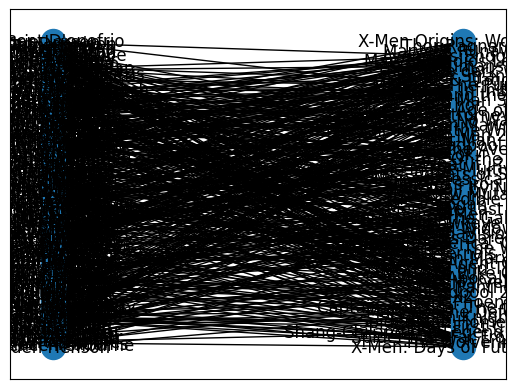

In [11]:
nx.draw_networkx(G,pos=nx.drawing.bipartite_layout(G,actors),width=1)

In [47]:
nx.write_gexf(G,'MCU_actors_movies_bipartite.gexf')

In [12]:
actors_movie_count = {}
for n ,d in G.nodes(data=True):
    if d['bipartite'] == 'Actors':
        actors_movie_count[n] = G.degree[n]
actors_movie_count = sorted(list(actors_movie_count.items()),key=lambda x : x[1],reverse=True)
actors_movie_count

[('Samuel L. Jackson', 10),
 ('Chris Hemsworth', 10),
 ('Hugh Jackman', 9),
 ('Paul Bettany', 9),
 ('Robert Downey Jr.', 9),
 ('Scarlett Johansson', 9),
 ('Jeremy Renner', 8),
 ('Mark Ruffalo', 8),
 ('Chris Evans', 8),
 ('Jon Favreau', 7),
 ('Patrick Stewart', 7),
 ('Clark Gregg', 7),
 ('Tom Holland', 6),
 ('Idris Elba', 6),
 ('Gweneth Paltrow', 5),
 ('Famke Janssen', 5),
 ('Anthony Mackie', 5),
 ('Elisabeth Olsen', 5),
 ('Tom Hiddleston', 5),
 ('Ian McKellen', 5),
 ('Tessa Thompson', 5),
 ('Paul Rudd', 5),
 ('Benedict Cumberbatch', 5),
 ('Shawn Ashmore', 4),
 ('Natalie Portman', 4),
 ('Dave Bautista', 4),
 ('William Hurt', 4),
 ('Charlie Cox', 4),
 ('Michael Fassbender', 4),
 ('Nicholas Hoult', 4),
 ('Halle Berry', 4),
 ('Evangeline Lilly', 4),
 ('Taika Waititi', 4),
 ('Hayley Atwell', 4),
 ('Zoe Saldana', 4),
 ('Evan Peters', 4),
 ('Benedict Wong', 4),
 ('James Marsden', 4),
 ('Emily VanCamp', 4),
 ('Chris Patt', 4),
 ('James McAvoy', 4),
 ('Vin Diesel', 4),
 ('Anna Paquin', 4),
 ('C

Text(0.5, 1.0, 'Movie-Actor Count')

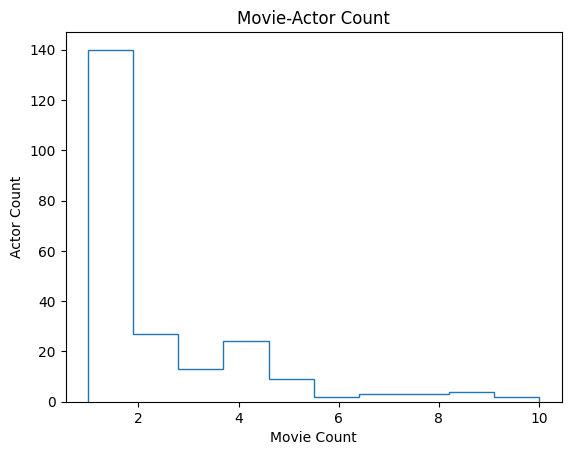

In [30]:
counts, bins = np.histogram([i[1] for i in actors_movie_count])
plt.stairs(counts, bins)
plt.xlabel("Movie Count")
plt.ylabel("Actor Count")
plt.title('Movie-Actor Count')

In [13]:
potential_actors = {}
for n , d in G.nodes(data=True):
    if d['bipartite'] == 'Actors' and G.degree[n] <= 2:
        rating = 0
        for neighbour in G.neighbors(n):
            rating += G.nodes[neighbour]['rating']
        rating /= G.degree[n]
        potential_actors[n] = rating
potential_actors = sorted(list(potential_actors.items()),key=lambda x : x[1],reverse=True)
potential_actors

[('Martin Freeman', 92.0),
 ('Michael B. Jordan', 92.0),
 ('Letitia Wright', 92.0),
 ("Lupita Nyong'o", 92.0),
 ('Rish Shah', 88.0),
 ('Mehwish Hayat', 88.0),
 ('Fawad Khan', 88.0),
 ('Matt Lintz', 88.0),
 ('Yasmeen Fletcher', 88.0),
 ('Iman Vellani', 88.0),
 ('Ming-Na Wen', 85.0),
 ('Iain De Caestecker', 85.0),
 ('Brett Dalton', 85.0),
 ('Chloe Bennet', 85.0),
 ('Elizabeth Henstridge', 85.0),
 ('Cate Blanchett', 84.0),
 ('Boyd Holbrook', 84.0),
 ('Kathryn Hahn', 84.0),
 ('Randall Park', 84.0),
 ('Stephen Merchant', 84.0),
 ('Kat Dennings', 84.0),
 ('Teyonah Parris', 84.0),
 ('Bradely Cooper', 84.0),
 ('Dafne Keen', 84.0),
 ("Vincent D'onofrio", 84.0),
 ('Jonathan Majors', 83.0),
 ('Rosario Dawson', 83.0),
 ('Theo Rossi', 83.0),
 ('Sophia Di Martino', 83.0),
 ('Alfre Woodard', 83.0),
 ('Owen Wilson', 83.0),
 ('Michael Keaton', 83.0),
 ('Mahershala Ali', 83.0),
 ('Jeff Goldblum', 82.0),
 ('Andrew Garfield', 82.0),
 ('Tobey Maguire', 82.0),
 ('Erin Moriarty', 82.0),
 ('David Tennant', 82

In [15]:
result_movies = {}
for n,d in G.nodes(data=True):
    if d['bipartite'] == 'Movies and Series':
        count = 0
        for i in G.neighbors(n):
            if G.degree[i] == 1:
                count += 1
        result_movies[n] = count
result_movies = sorted(list(result_movies.items()),key=lambda x : x[1],reverse=True)
result_movies

[('Inhumans', 8),
 ('Cloak & Dagger', 7),
 ('The New Mutants', 7),
 ("Marvel's Runaways", 6),
 ('Ms. Marvel', 6),
 ('Eternals', 5),
 ("Marvels' Agents of S.H.I.E.L.D.", 5),
 ("Marvel's The Punisher", 5),
 ('Hawkeye', 5),
 ('Moon Knight', 5),
 ('X-Men Origins: Wolverine', 5),
 ('Black Panther', 4),
 ("Marvel's Agent Carter", 4),
 ('Marvel - Jessica Jones', 4),
 ('WandaVision', 4),
 ('The Wolverine', 4),
 ('Shang-Chi and the Legend of the Ten Rings', 3),
 ('Werewolf by Night', 3),
 ("Marvel's Luke Cage", 3),
 ("Marvel's Iron Fist", 3),
 ('Loki', 3),
 ('She-Hulk: Attorney at Law', 3),
 ('Logan', 3),
 ('Deadpool 2', 3),
 ('The incredible Hulk', 2),
 ('Ant-Man and the Wasp', 2),
 ('Black Widow', 2),
 ('Spider-Man: No Way Home', 2),
 ('The Falcon and the Winter Soldier', 2),
 ('What If...?', 2),
 ('Deadpool', 2),
 ('Iron Man', 1),
 ('Iron Man 2', 1),
 ('Captain America: The first Avenger', 1),
 ('Iron Man 3', 1),
 ('Guardians Of the Galaxy', 1),
 ('Ant-Man', 1),
 ('Doctor Strange', 1),
 ('Sp

In [18]:
B = bipartite.weighted_projected_graph(G, actors, ratio=False)
B.edges(data=True)

EdgeDataView([('Elden Henson', 'Jon Bernthal', {'weight': 1}), ('Elden Henson', 'Jessica Henwick', {'weight': 1}), ('Elden Henson', 'Rachel Taylor', {'weight': 2}), ('Elden Henson', 'Mahershala Ali', {'weight': 1}), ('Elden Henson', 'Charlie Cox', {'weight': 2}), ('Elden Henson', 'Simone Missick', {'weight': 2}), ('Elden Henson', 'Alfre Woodard', {'weight': 1}), ('Elden Henson', 'Rosario Dawson', {'weight': 1}), ('Elden Henson', "Vincent D'onofrio", {'weight': 1}), ('Elden Henson', 'Deborah Ann Woll', {'weight': 2}), ('Elden Henson', 'Rossario Dawson', {'weight': 1}), ('Elden Henson', 'Theo Rossi', {'weight': 1}), ('Elden Henson', 'Finn Jones', {'weight': 2}), ('Elden Henson', 'Mike Colter', {'weight': 2}), ('Laurence Fishburne', 'Paul Rudd', {'weight': 1}), ('Laurence Fishburne', 'Micheal Pena', {'weight': 1}), ('Laurence Fishburne', 'Michael Douglas', {'weight': 1}), ('Laurence Fishburne', 'Evangeline Lilly', {'weight': 1}), ('Racheal McAdams', 'Elisabeth Olsen', {'weight': 1}), ('Ra

In [32]:
nx.write_gexf(B,'MCU_actors_projections.gexf')

In [20]:
pair_count=sorted(B.edges(data=True), key=lambda t: t[2]['weight'],reverse=True)
pair_count

[('Paul Bettany', 'Robert Downey Jr.', {'weight': 7}),
 ('Scarlett Johansson', 'Chris Evans', {'weight': 7}),
 ('Hugh Jackman', 'Patrick Stewart', {'weight': 6}),
 ('Paul Bettany', 'Scarlett Johansson', {'weight': 6}),
 ('Robert Downey Jr.', 'Scarlett Johansson', {'weight': 6}),
 ('Jeremy Renner', 'Mark Ruffalo', {'weight': 6}),
 ('Mark Ruffalo', 'Chris Hemsworth', {'weight': 6}),
 ('Chris Hemsworth', 'Idris Elba', {'weight': 6}),
 ('Hugh Jackman', 'Famke Janssen', {'weight': 5}),
 ('Hugh Jackman', 'Ian McKellen', {'weight': 5}),
 ('Jon Favreau', 'Robert Downey Jr.', {'weight': 5}),
 ('Paul Bettany', 'Chris Evans', {'weight': 5}),
 ('Patrick Stewart', 'Famke Janssen', {'weight': 5}),
 ('Patrick Stewart', 'Ian McKellen', {'weight': 5}),
 ('Gweneth Paltrow', 'Robert Downey Jr.', {'weight': 5}),
 ('Robert Downey Jr.', 'Jeremy Renner', {'weight': 5}),
 ('Robert Downey Jr.', 'Chris Evans', {'weight': 5}),
 ('Jeremy Renner', 'Scarlett Johansson', {'weight': 5}),
 ('Jeremy Renner', 'Chris Eva

Text(0.5, 1.0, 'Counts of Pairs in Same Movie')

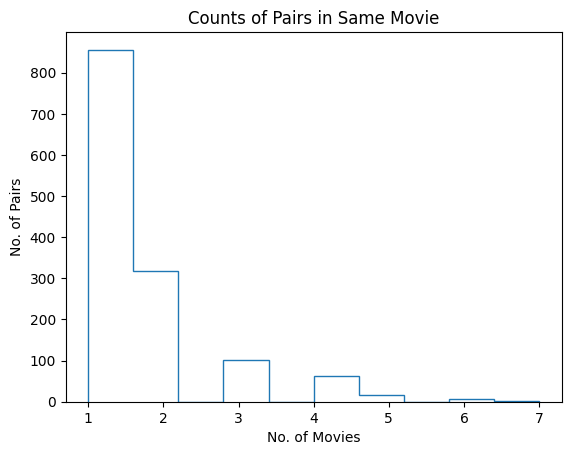

In [29]:
counts, bins = np.histogram([i[2]['weight'] for i in pair_count])
plt.stairs(counts, bins)
plt.xlabel("No. of Movies")
plt.ylabel("No. of Pairs")
plt.title('Counts of Pairs in Same Movie')

In [21]:
number_of_connected_components = nx.number_connected_components(B)
print('Number of Connected Components : ', number_of_connected_components,end='\n\n')
connected_components = list(nx.connected_components(B))
for i in connected_components:
    print(i,end='\n\n')


Number of Connected Components :  7

{'Elden Henson', 'Laurence Fishburne', 'Racheal McAdams', 'Shawn Ashmore', 'Simu Liu', 'Natalie Portman', 'Chiswetel Ejiofor', 'Hugo Weaving', 'Martin Freeman', 'Dave Bautista', 'Virginia Gardner', 'Alaqua Cox ', 'Florence Pugh', 'Cate Blanchett', 'William Hurt', 'Rish Shah', 'Rachel Taylor', 'Hugh Jackman', 'Micheal Pena', 'Jon Favreau', 'Jacob Batalon', 'Terrence Howard', 'Charlie Cox', 'Hailee Steinfeld', 'Michael Fassbender', 'David Wenham', 'Rila Fukushima', 'Chad Michel Murray', 'Michael B. Jordan', 'Ming-Na Wen', 'Ginger Gonzaga', 'Bruce Davison', 'Vera Farmiga', 'Jeff Goldblum', 'Paul Bettany', 'Boyd Holbrook', 'Finn Jones', 'Mehwish Hayat', 'Edward Norton', 'Nicholas Hoult', 'Tom Pelphery', 'Kathryn Hahn', 'Ben Mendelsohn', 'Halle Berry', 'Andrew Garfield', 'Jessica Henwick', 'Morena Baccarin', 'Patrick Stewart', 'Enver Gjokaj', 'Jasan R. Moore', 'Tom Holland', 'Lyrica Okano', 'Liev Schreiber', 'Tobey Maguire', 'David Harbour', 'Alexandra S

Number of actors in largest connected components :  192


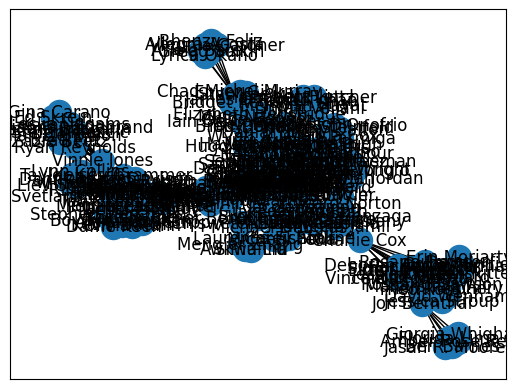

In [34]:
largest_connected_component = list(sorted(connected_components,reverse=True,key=len)[0])
print('Number of actors in largest connected components : ',len(largest_connected_component))
sub_graph = B.subgraph(largest_connected_component).copy()
nx.draw_networkx(sub_graph)

In [36]:
nx.write_gexf(sub_graph,'MCU_actors_largest_component.gexf')

In [37]:
edge_betweenness_centrality = nx.edge_betweenness_centrality(sub_graph)
edge_betweenness_centrality = sorted(list(edge_betweenness_centrality.items()),key=lambda x : x[1],reverse=True)
edge_betweenness_centrality


[(('Benedict Cumberbatch', 'Patrick Stewart'), 0.14523183675914456),
 (('Charlie Cox', 'Benedict Cumberbatch'), 0.10314898009590136),
 (('Vinnie Jones', 'Patrick Stewart'), 0.08962162501589103),
 (('Evan Peters', 'Paul Bettany'), 0.07534023671800846),
 (('Elisabeth Olsen', 'Patrick Stewart'), 0.07197261452094082),
 (('Benedict Wong', 'Patrick Stewart'), 0.05855120988493743),
 (('Charlie Cox', 'Jon Bernthal'), 0.05511795686861132),
 (('Charlie Cox', 'Mark Ruffalo'), 0.04625624711603117),
 (('Samuel L. Jackson', 'Stan Lee'), 0.04619688292388531),
 (('Charlie Cox', 'Jon Favreau'), 0.03953954144788828),
 (('Hugh Jackman', 'Patrick Stewart'), 0.03891313322658156),
 (('Rachel Taylor', 'Charlie Cox'), 0.034195935136707344),
 (('Charlie Cox', 'Tom Holland'), 0.03379894219657242),
 (('Finn Jones', 'Charlie Cox'), 0.02989474258289699),
 (('Rosario Dawson', 'Charlie Cox'), 0.027246945898778362),
 (('Charlie Cox', 'Jessica Henwick'), 0.024462805410122114),
 (('Evan Peters', 'Hugh Jackman'), 0.0224

In [38]:
from networkx.algorithms import community

comp = community.girvan_newman(sub_graph)
communities = tuple(c for c in next(comp))
print('Communities detected : ',len(communities),end='\n\n')
for i in communities:
    print(i,end='\n\n')

Communities detected :  2

{'Simu Liu', 'Elisabeth Olsen', 'Tim Roth', 'Emily VanCamp', 'Chloe Bennet', 'Ben Kingsley', 'Elizabeth Henstridge', 'Natalie Portman', 'Rachel Weisz', 'MIchel B. Jordan', 'Finn Jones', 'Mahershala Ali', 'Chiswetel Ejiofor', 'Edward Norton', 'Tatiana Maslany', 'Danial Bruhl', 'Vin Diesel', 'Colby Minifie', 'Jake Gyllenhaal', 'Zoe Saldana', 'Randall Park', 'Samuel L. Jackson', 'Kat Dennings', 'Hugo Weaving', 'Kathryn Hahn', 'Liv Tyler', 'Sophia Di Martino', 'Letitia Wright', 'Rachel Taylor', 'Idris Elba', 'Alaqua Cox ', 'Hailee Steinfeld', 'Clark Gregg', 'Virginia Gardner', 'Laurence Fishburne', 'Danniel Bruhl', 'Rossario Dawson', 'Erin Moriarty', 'Vera Farmiga', 'Micheal Pena', 'Taika Waititi', 'Sebastian Stan', 'Michael Douglas', 'Jonathan Majors', 'Giorgia Whigham', 'William Hurt', 'Dave Bautista', 'Xochiti Gomez', 'Elizabeth Olsen', 'Hayley Atwell', 'David Wenham', 'Mickey Rourke', 'Chris Evans', 'Jeff Goldblum', 'Corey Stall', 'Chris Hemsworth', 'Ariela B